## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

This notebook is intended to analyse the cleaned precipitation data of the cities of Seattle and St. Louis.

We are trying to determine which city is "rainier" by looking at which city experiences more days where it actually rains, and which city experiences more precipitation overall, meaning the actual recorded rain levels.


The original Seattle and St. Louis data was sourced from NOAA:

https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND


The cleaned data has been stored in my Seattle-Weather github repo:

https://raw.githubusercontent.com/pintoanabel/Seattle-Weather/main/clean_seattle_stl_weather.csv


The Google Colab notebook in which the data cleaning process occurred is also linked here:

https://colab.research.google.com/drive/1cn3vD0eJrsATVTj_PBCxhdDgRtPYf7b7?usp=share_link



## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [2]:
df_rain = pd.read_csv('https://raw.githubusercontent.com/pintoanabel/Seattle-Weather/main/clean_seattle_stl_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

Run the commented code to add in a 'year' column (I added a year column for my last analysis)

In [21]:
## df_rain['year'] = pd.DatetimeIndex(df_rain['date']).year

In [22]:
df_rain

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.00,1,1,2018
1,2018-01-02,STL,0.00,2,1,2018
2,2018-01-03,STL,0.00,3,1,2018
3,2018-01-04,STL,0.00,4,1,2018
4,2018-01-05,STL,0.00,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,2022
3648,2022-12-28,SEA,0.40,362,12,2022
3649,2022-12-29,SEA,0.03,363,12,2022
3650,2022-12-30,SEA,0.62,364,12,2022


In [3]:
df_rain[df_rain['precipitation'].isna() == True]

,date,city,precipitation,day_of_year,month


there are no missing values in the dataset, and the dataframe has been limited to date, city, precipitation, day of year, and month, so we are good to go!

## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

How many days over the 5 years did each city record no rainfall?

How many days over the 5 years did each city record at least 1.5 inches of rain?

What was the average monthly recorded rainfall for each city?

## Analysis

### Days with No Rain

Create a dataframe that consists of a subset of the combined data, displaying only the days from each city where no rainfall was recorded, over the 5 years.

In [4]:
df_no_rain = df_rain.loc[df_rain['precipitation'] == 0.0, ['month', 'day_of_year', 'city', 'precipitation']]

df_no_rain

,month,day_of_year,city,precipitation
0,1,1,STL,0.0
1,1,2,STL,0.0
2,1,3,STL,0.0
3,1,4,STL,0.0
4,1,5,STL,0.0
...,...,...,...,...
3614,11,328,SEA,0.0
3622,12,336,SEA,0.0
3624,12,338,SEA,0.0
3635,12,349,SEA,0.0


Now this data is ready to be plotted as a bar graph.

We will generate a barplot using .value_counts() so that the y-axis displays the number of days recorded without rain (by counting the number of observations that appear in the no_rain dataframe)

<Axes: title={'center': 'Days with No Rain'}, xlabel='City', ylabel='Number of Days'>

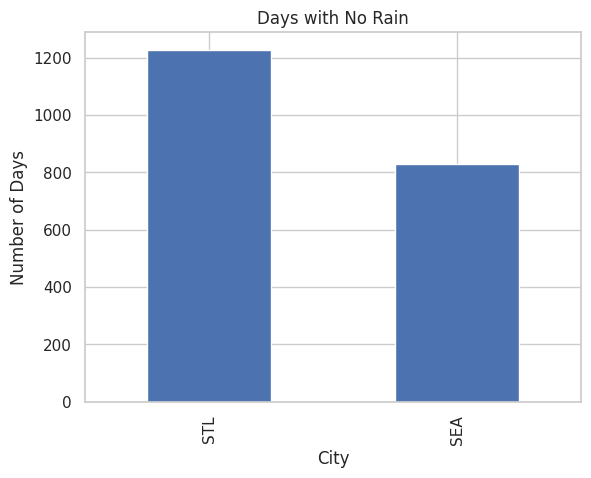

In [5]:
df_no_rain['city'].value_counts().plot(kind = 'bar', ylabel = 'Number of Days', xlabel = 'City', title = 'Days with No Rain')

Overall, St. Louis (STL) has more days recorded without rain, and Seattle (SEA) has less days without rain.

### Days with Some (at least 1.5in) of Rain

Now, we create a dataframe  that consists of a subset of the combined data, displaying only the days from each city where at least 1.5 inches of rainfall was recorded, over the 5 years.

In [6]:
df_some_rain = df_rain.loc[df_rain['precipitation'] >= 1.5, ['day_of_year', 'city', 'precipitation']]

df_some_rain

,day_of_year,city,precipitation
54,55,STL,1.73
137,138,STL,1.61
453,89,STL,1.65
472,108,STL,1.58
484,120,STL,2.36
505,141,STL,1.79
567,203,STL,3.30
588,224,STL,2.68
698,334,STL,1.50
739,10,STL,2.16


Now this data is ready to be plotted as a bar graph.

We will generate a barplot using .value_counts() so that the y-axis displays the number of days with at least 1.5 inches of rain recorded (by counting the number of observations that appear in the some_rain dataframe, just like we did with no_rain)

<Axes: title={'center': 'Days with 1.5 or more Inches of Rain'}, xlabel='City', ylabel='Number of Days'>

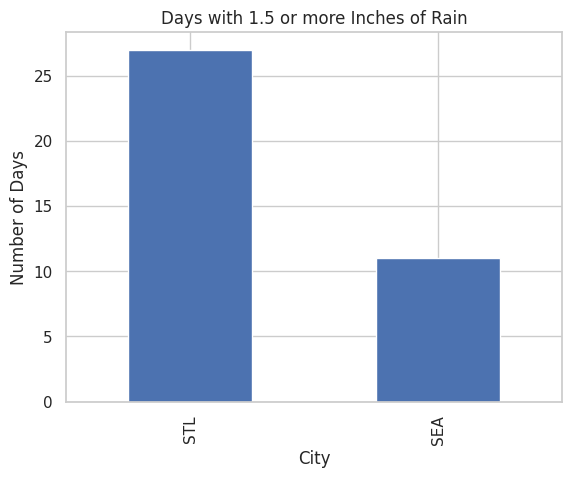

In [7]:
df_some_rain['city'].value_counts().plot(kind = 'bar', ylabel = 'Number of Days', xlabel = 'City', title = 'Days with 1.5 or more Inches of Rain')

St. Louis (STL) appears to have more days where at least 1.5 inches of rainfall were recorded, while Seattle (SEA) has less than half the number of days with a minimum of 1.5 inches of rainfall.

### Average Monthly Rainfall

Now we create a dataframe that groups the rainfall data by city and month (we created the 'month' variable for the cleaned dataframe). This dataframe will display the average rainfall for each city by month.

In [23]:
city_month = df_rain.groupby(['city', 'month'])

monthly_avg_prcp = city_month['precipitation'].mean().reset_index(name = 'avg_prcp')


monthly_avg_prcp

,city,month,avg_prcp
0,SEA,1,0.230742
1,SEA,2,0.176472
2,SEA,3,0.089075
3,SEA,4,0.100483
4,SEA,5,0.069161
5,SEA,6,0.063167
6,SEA,7,0.013984
7,SEA,8,0.019995
8,SEA,9,0.055622
9,SEA,10,0.118452


Now this data can be plotted as a bar graph.

With the numbered months (1-12) along the x-axis, the average precipitation in inches for each city is plotted against the y-axis. The blue bars represent the average rainfall for Seattle, and the orange represents St. Louis' rainfall.

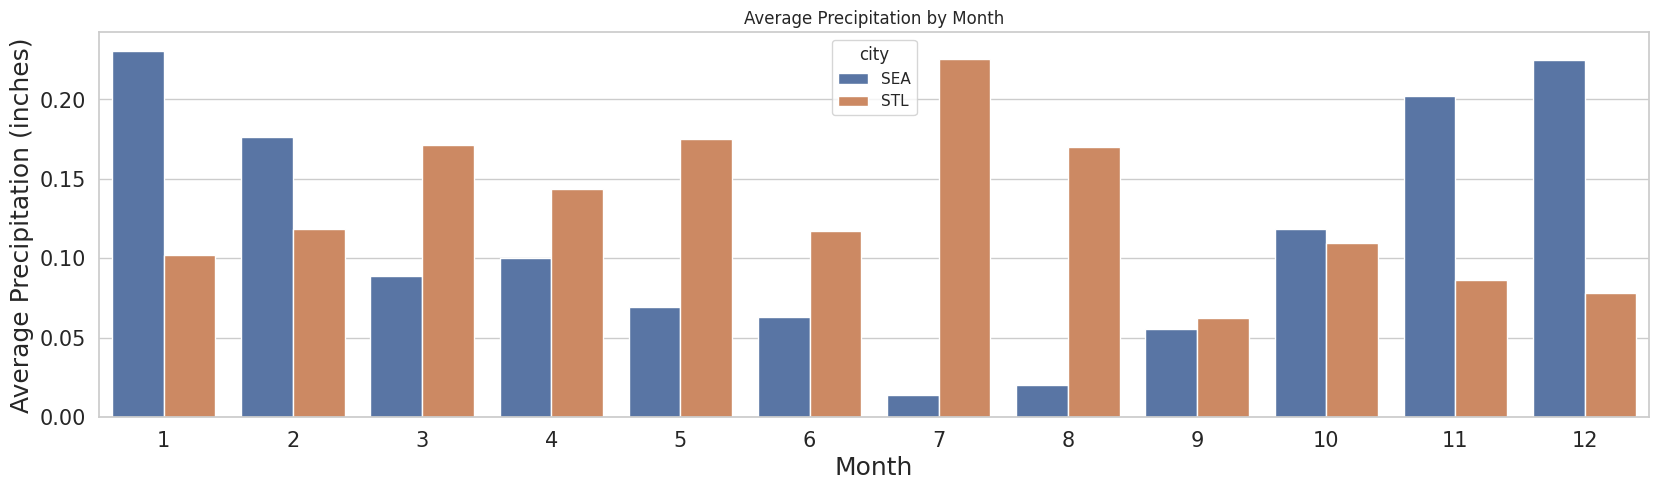

In [26]:
plt.figure(figsize = (20, 5))


city_month = df_rain.groupby(['city', 'month'])

monthly_avg_prcp = city_month['precipitation'].mean().reset_index(name = 'avg_prcp')

sns.barplot(x = 'month', y = 'avg_prcp', hue = 'city', data = monthly_avg_prcp)

plt.title('Average Precipitation by Month')
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Average Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)

plt.show()

Looks like STL had a higher average recorded monthly rainfall!

### Average Yearly Rainfall

Now let's make a similar dataframe of average rainfall for each city, but grouped by year instead of by month. The commented code at the beginnning of the notebook is what creates the 'year' column that will be used for this analysis.

In [25]:
city_month = df_rain.groupby(['city', 'year'])

yearly_avg_prcp = city_month['precipitation'].mean().reset_index(name = 'avg_prcp')


yearly_avg_prcp

,city,year,avg_prcp
0,SEA,2018,0.102039
1,SEA,2019,0.105900
2,SEA,2020,0.118092
3,SEA,2021,0.121737
4,SEA,2022,0.118571
5,STL,2018,0.116712
6,STL,2019,0.147918
7,STL,2020,0.136612
8,STL,2021,0.116384
9,STL,2022,0.134082


Now the data is ready to be plotted in a bar graph.

With the years along the x-axis, the average precipitation in inches for each city is plotted against the y-axis. The blue bars represent the average yearly rainfall for Seattle, and the orange represents St. Louis' rainfall.

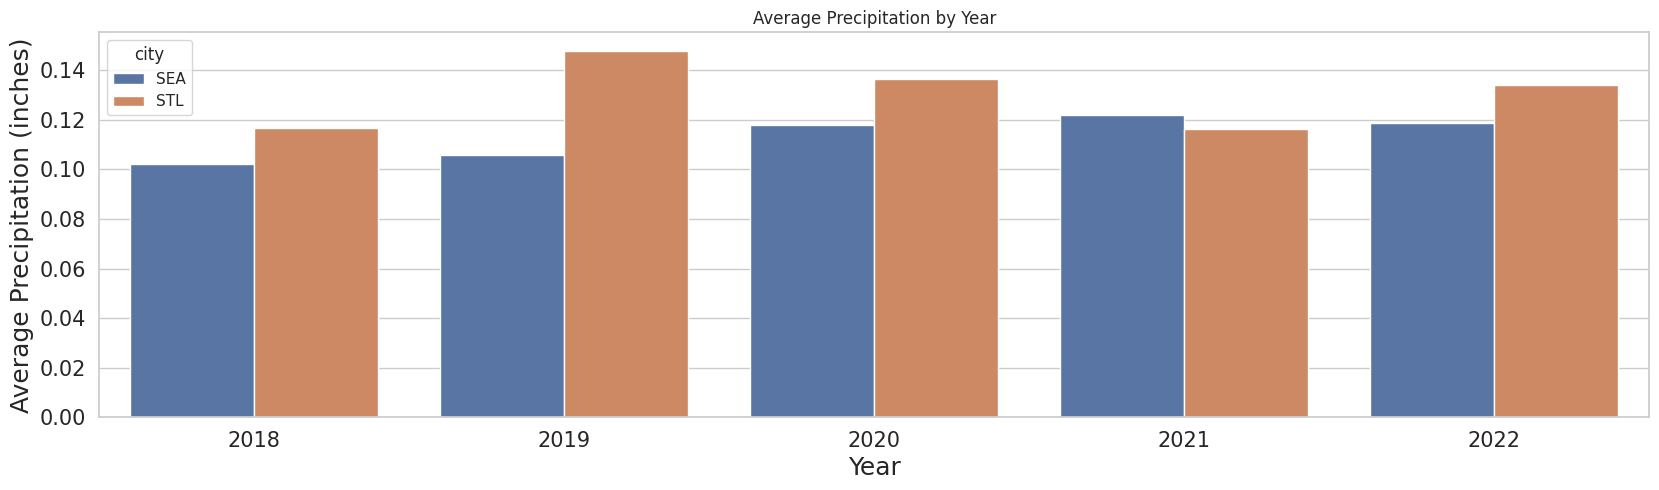

In [28]:
plt.figure(figsize = (20, 5))


city_month = df_rain.groupby(['city', 'year'])

yearly_avg_prcp = city_month['precipitation'].mean().reset_index(name = 'avg_prcp')

sns.barplot(x = 'year', y = 'avg_prcp', hue = 'city', data = yearly_avg_prcp)

plt.title('Average Precipitation by Year')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Average Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)

plt.show()

St. Louis (STL) tends to have a higher average yearly rainfall than Seattle (SEA) aside from the year 2021, in which Seattle had a slightly higher average.

## Conclusion

Overall, it appears that the city of Seattle has more actual recorded days where it rained (days where precipitation was recorded).

On the other hand, the city of St. Louis overall had heavier rainfall, meaning that more precipitation was recorded when it actually rained there as compared to Seattle. So even though there were less rainy days in STL than in SEA, the days where it did rain in STL experienced more rain during those times.